In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import linear_model
import warnings
import dateutil
from datetime import datetime
import calendar
from pandas.api.types import CategoricalDtype

In [2]:
data_Consumers = pd.read_csv(r'C:\Study\Data Science\Learn Data Science with Python\Task\Consumers.csv')

In [3]:
data_Pos = pd.read_csv(r'C:\Study\Data Science\Learn Data Science with Python\Task\Pos.csv')

In [4]:
data_Products = pd.read_csv(r'C:\Study\Data Science\Learn Data Science with Python\Task\Products.csv')

In [5]:
data=pd.merge(data_Pos,data_Products, on = 'pid' )

In [6]:
data.head()

,pid,cid,rid,date,time,price,discount,price_addedvat,marginal,quantity,category,eco
0,4401628,107430927,7,18-01-01,09:01:19,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0
1,4401628,136502829,46,18-01-01,10:02:00,9.567943,0.0,10.716078,2.867688,1.0,Dairy and eggs,0
2,4401628,159696310,226,18-01-02,09:02:07,10.147801,0.0,11.365538,2.495006,1.0,Dairy and eggs,0
3,4401628,130016198,162,18-01-02,09:03:02,40.591206,0.0,45.462151,9.980025,4.0,Dairy and eggs,0
4,4401628,122455719,145,18-01-02,09:05:24,9.567943,0.0,10.716078,2.867688,1.0,Dairy and eggs,0


In [7]:
datad=pd.merge(data,data_Consumers, on = 'cid' )

In [8]:
datad.head()

,pid,cid,rid,date,time,price,discount,price_addedvat,marginal,quantity,category,eco,gender,age,postalcode
0,4401628,107430927,7,18-01-01,09:01:19,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134
1,4401628,107430927,6783,18-02-15,16:04:23,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134
2,4401628,107430927,12046,18-03-22,10:30:16,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134
3,4423732,107430927,7,18-01-01,09:01:19,12.467345,0.0,13.963375,6.059347,1.0,Vegetables and fruits,0,0,55,37134
4,4423732,107430927,24384,18-06-07,11:09:03,12.467345,0.0,13.963375,6.048523,1.0,Vegetables and fruits,0,0,55,37134


In [9]:
datad['purchase']=datad['discount']+datad['price_addedvat']

In [10]:
datad.head()

,pid,cid,rid,date,time,price,discount,price_addedvat,marginal,quantity,category,eco,gender,age,postalcode,purchase
0,4401628,107430927,7,18-01-01,09:01:19,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267
1,4401628,107430927,6783,18-02-15,16:04:23,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267
2,4401628,107430927,12046,18-03-22,10:30:16,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267
3,4423732,107430927,7,18-01-01,09:01:19,12.467345,0.0,13.963375,6.059347,1.0,Vegetables and fruits,0,0,55,37134,13.963375
4,4423732,107430927,24384,18-06-07,11:09:03,12.467345,0.0,13.963375,6.048523,1.0,Vegetables and fruits,0,0,55,37134,13.963375


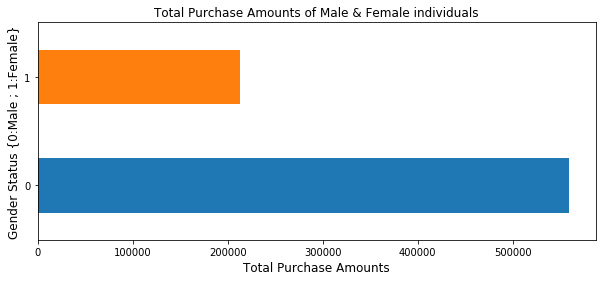

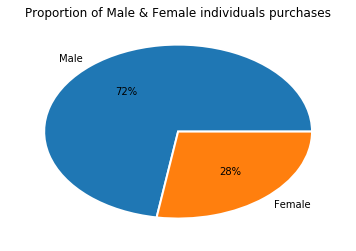

In [11]:
#Comparing total purchase amounts of Male & Female individuals   #   Not working
pl.figure(figsize =(10,4))
#dataNew.groupby('gender').purchase.sum().plot('barh')
datad.groupby('gender').purchase.count().plot('barh')

#dataNew[dataNew['price_addedvat']+ data[' discount ']].groupby([' category ']).purchase.count()
pl.ylabel('Gender Status {0:Male ; 1:Female}', fontsize=12)
pl.xlabel('Total Purchase Amounts', fontsize=12)
pl.title('Total Purchase Amounts of Male & Female individuals', fontsize=12)
plt.show()

plt.pie(datad["gender"].value_counts().values, labels=["Male","Female"], autopct="%1.0f%%", wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Proportion of Male & Female individuals purchases")
plt.show()


In [12]:
datag=datad

In [13]:
datag.describe()

,pid,cid,rid,price,discount,price_addedvat,marginal,quantity,eco,gender,age,postalcode,purchase
count,7.721820e+05,7.721820e+05,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000,772182.000000
mean,6.346639e+06,1.328194e+08,28802.188901,24.065330,-1.496217,28.659163,6.273519,1.221337,0.038123,0.275646,49.824873,37193.590198,27.162945
std,3.555690e+06,1.816107e+07,16697.548298,32.700340,8.257963,40.445649,10.021729,13.973620,0.191494,0.446840,15.833014,955.089397,37.862311
min,8.000000e+00,1.014566e+08,1.000000,-710.501434,-1082.432160,-795.760827,-367.334178,-8.260000,0.000000,0.000000,20.000000,37130.000000,-795.760827
25%,4.349421e+06,1.182611e+08,14320.000000,11.549226,0.000000,13.963375,2.314132,1.000000,0.000000,0.000000,37.000000,37142.000000,12.880943
50%,4.414560e+06,1.315419e+08,28731.000000,18.266043,0.000000,21.540400,4.813901,1.000000,0.000000,0.000000,48.000000,37149.000000,20.457968
75%,9.890323e+06,1.478355e+08,43259.000000,26.964143,0.000000,31.931749,8.213387,1.000000,0.000000,1.000000,61.000000,37159.000000,30.253979
max,1.443733e+07,1.692695e+08,57563.000000,5412.160800,0.000000,5412.160800,2036.599032,9632.000000,1.000000,1.000000,98.000000,59331.000000,5412.160800


In [14]:
datag['date']=datag['date'].apply(dateutil.parser.parse,yearfirst=True)

In [15]:
datag.head()

,pid,cid,rid,date,time,price,discount,price_addedvat,marginal,quantity,category,eco,gender,age,postalcode,purchase
0,4401628,107430927,7,2018-01-01,09:01:19,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267
1,4401628,107430927,6783,2018-02-15,16:04:23,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267
2,4401628,107430927,12046,2018-03-22,10:30:16,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267
3,4423732,107430927,7,2018-01-01,09:01:19,12.467345,0.0,13.963375,6.059347,1.0,Vegetables and fruits,0,0,55,37134,13.963375
4,4423732,107430927,24384,2018-06-07,11:09:03,12.467345,0.0,13.963375,6.048523,1.0,Vegetables and fruits,0,0,55,37134,13.963375


In [16]:
datad=datag

In [17]:
type(datad['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
datad['month']=[d.month for d in datad['date']]

In [19]:
datad.head()

,pid,cid,rid,date,time,price,discount,price_addedvat,marginal,quantity,category,eco,gender,age,postalcode,purchase,month
0,4401628,107430927,7,2018-01-01,09:01:19,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267,1
1,4401628,107430927,6783,2018-02-15,16:04:23,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267,2
2,4401628,107430927,12046,2018-03-22,10:30:16,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267,3
3,4423732,107430927,7,2018-01-01,09:01:19,12.467345,0.0,13.963375,6.059347,1.0,Vegetables and fruits,0,0,55,37134,13.963375,1
4,4423732,107430927,24384,2018-06-07,11:09:03,12.467345,0.0,13.963375,6.048523,1.0,Vegetables and fruits,0,0,55,37134,13.963375,6


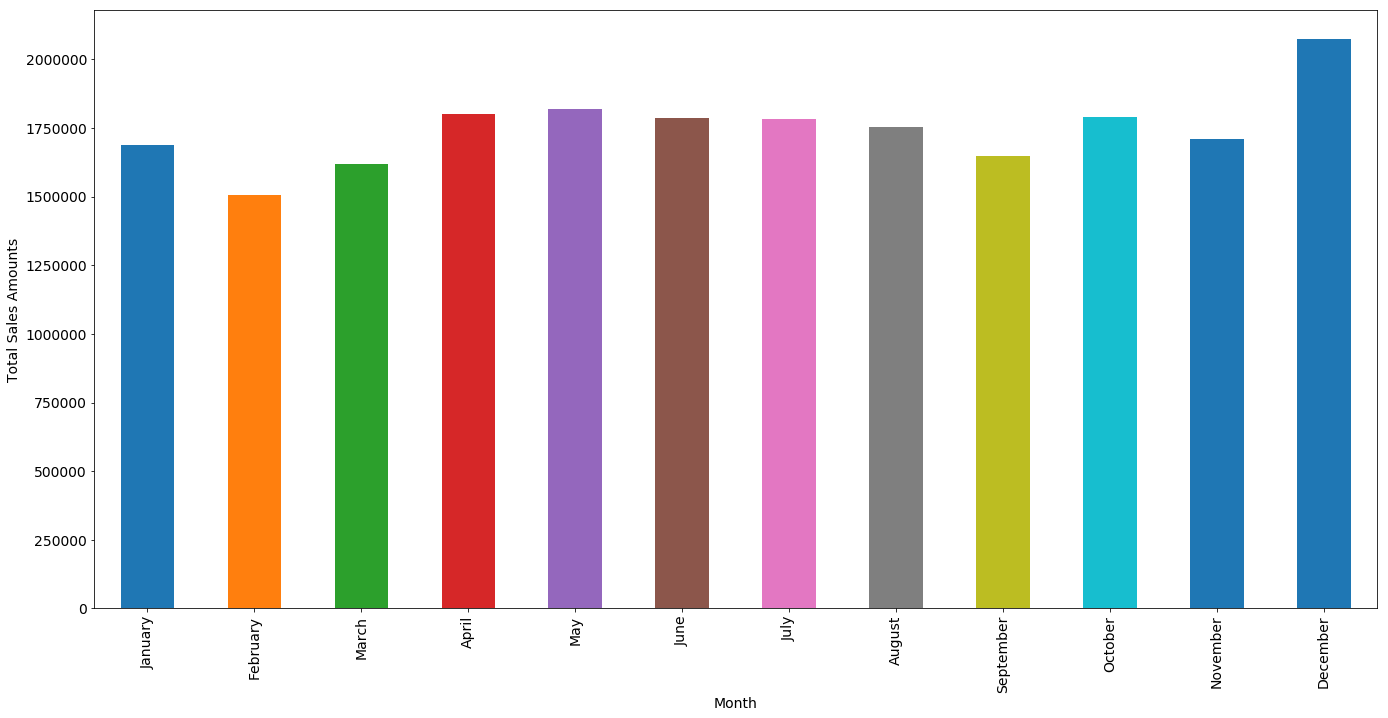

In [20]:
#Comparing total purchase amounts of different age individuals  # Need correction
pl.figure(figsize =(23,11))
datad.groupby('month').purchase.sum().plot('bar')
#pl.ylabel('Age', fontsize=12)
#pl.xlabel('Total Purchase Amounts', fontsize=12)
pl.xlabel('Month', fontsize=14)
pl.ylabel('Total Sales Amounts', fontsize=14)
plt.xticks(datad['month'].unique()-1,[calendar.month_name[i] for i in datad['month'].unique()],fontsize=14)
plt.yticks(fontsize=14)
#plt.xticks('Jan','Feb','')
#pl.title('Total Purchase Amounts of different month individuals', fontsize=14)
plt.show()

In [21]:
[calendar.month_name[i] for i in datad['month'].unique()]

['January',
 'February',
 'March',
 'June',
 'August',
 'September',
 'April',
 'May',
 'July',
 'October',
 'November',
 'December']

In [22]:
datad.groupby('month').purchase.sum()

month
1     1.686786e+06
2     1.504427e+06
3     1.619381e+06
4     1.799255e+06
5     1.820790e+06
6     1.784829e+06
7     1.783200e+06
8     1.753694e+06
9     1.648940e+06
10    1.789489e+06
11    1.709657e+06
12    2.074289e+06
Name: purchase, dtype: float64

In [23]:
datad['week']=[calendar.day_name[d.weekday()] for d in datad['date']]

In [24]:
datad.head()

,pid,cid,rid,date,time,price,discount,price_addedvat,marginal,quantity,category,eco,gender,age,postalcode,purchase,month,week
0,4401628,107430927,7,2018-01-01,09:01:19,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267,1,Monday
1,4401628,107430927,6783,2018-02-15,16:04:23,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267,2,Thursday
2,4401628,107430927,12046,2018-03-22,10:30:16,10.437785,0.0,11.690267,2.784990,1.0,Dairy and eggs,0,0,55,37134,11.690267,3,Thursday
3,4423732,107430927,7,2018-01-01,09:01:19,12.467345,0.0,13.963375,6.059347,1.0,Vegetables and fruits,0,0,55,37134,13.963375,1,Monday
4,4423732,107430927,24384,2018-06-07,11:09:03,12.467345,0.0,13.963375,6.048523,1.0,Vegetables and fruits,0,0,55,37134,13.963375,6,Thursday


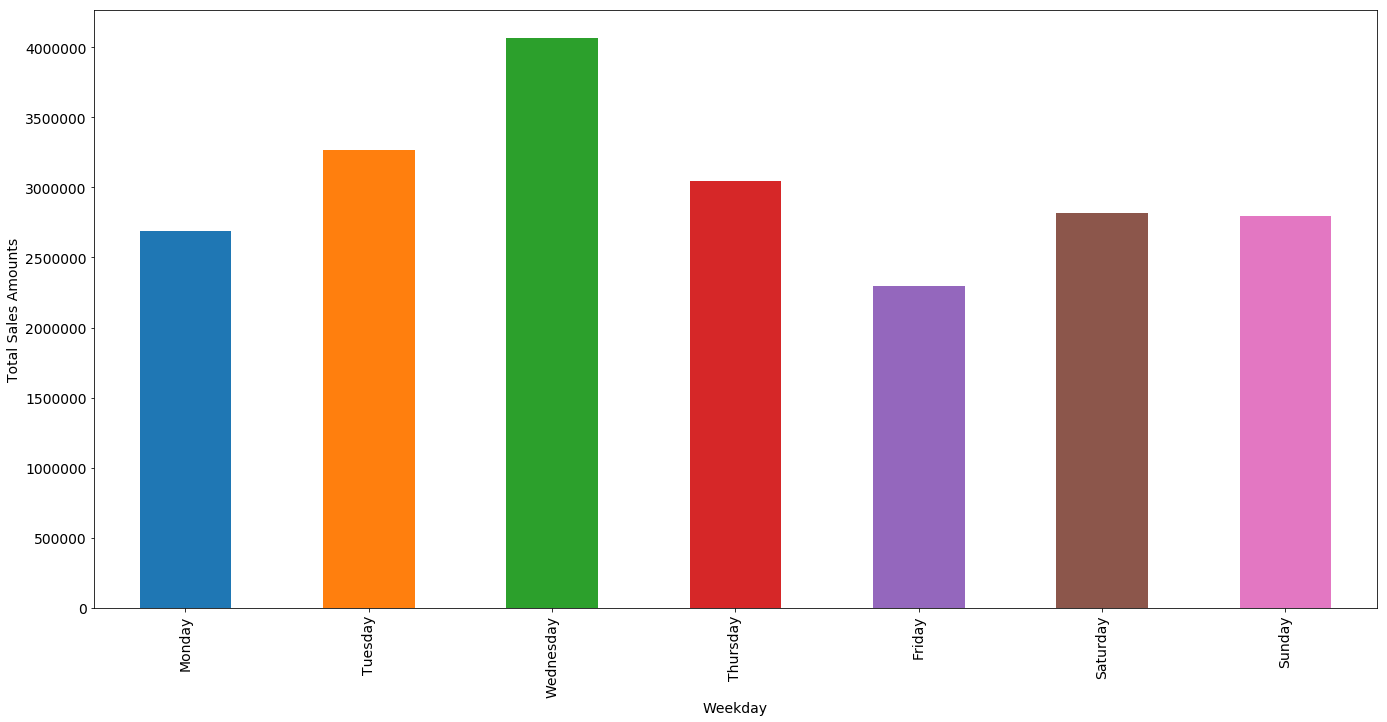

In [25]:
#Comparing total purchase amounts of different age individuals  # Need correction
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pl.figure(figsize =(23,11))
datad.groupby('week').purchase.sum().reindex(cats).plot('bar')
#pl.ylabel('Age', fontsize=12)
#pl.xlabel('Total Purchase Amounts', fontsize=12)
pl.xlabel('Weekday', fontsize=14)
pl.ylabel('Total Sales Amounts', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xticks('Jan','Feb','')
#pl.title('Total Purchase Amounts of different week individuals', fontsize=14)
plt.show()

In [26]:
dataT=datad

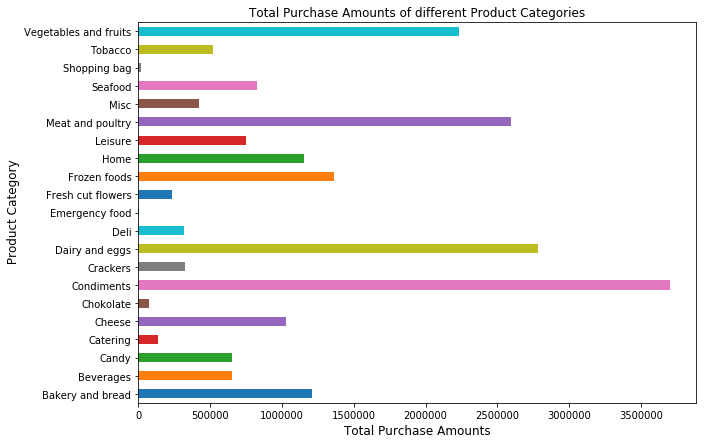

In [27]:
#Comparing total purchase amounts  Product catagory
pl.figure(figsize =(10,7))
dataT.groupby('category').purchase.sum().plot('barh')
pl.ylabel(' Product Category', fontsize=12)
pl.xlabel('Total Purchase Amounts', fontsize=12)
pl.title('Total Purchase Amounts of different Product Categories', fontsize=12)
plt.show()

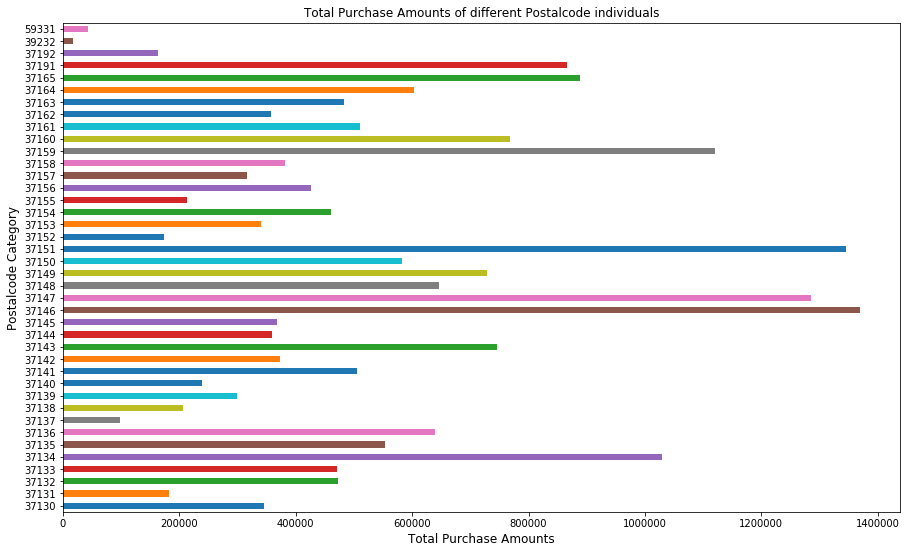

In [28]:
#Comparing total purchase amounts postalcode
pl.figure(figsize =(15,9))
dataT.groupby('postalcode').purchase.sum().plot('barh')
pl.ylabel('Postalcode Category', fontsize=12)
pl.xlabel('Total Purchase Amounts', fontsize=12)
pl.title('Total Purchase Amounts of different Postalcode individuals', fontsize=12)
plt.show()

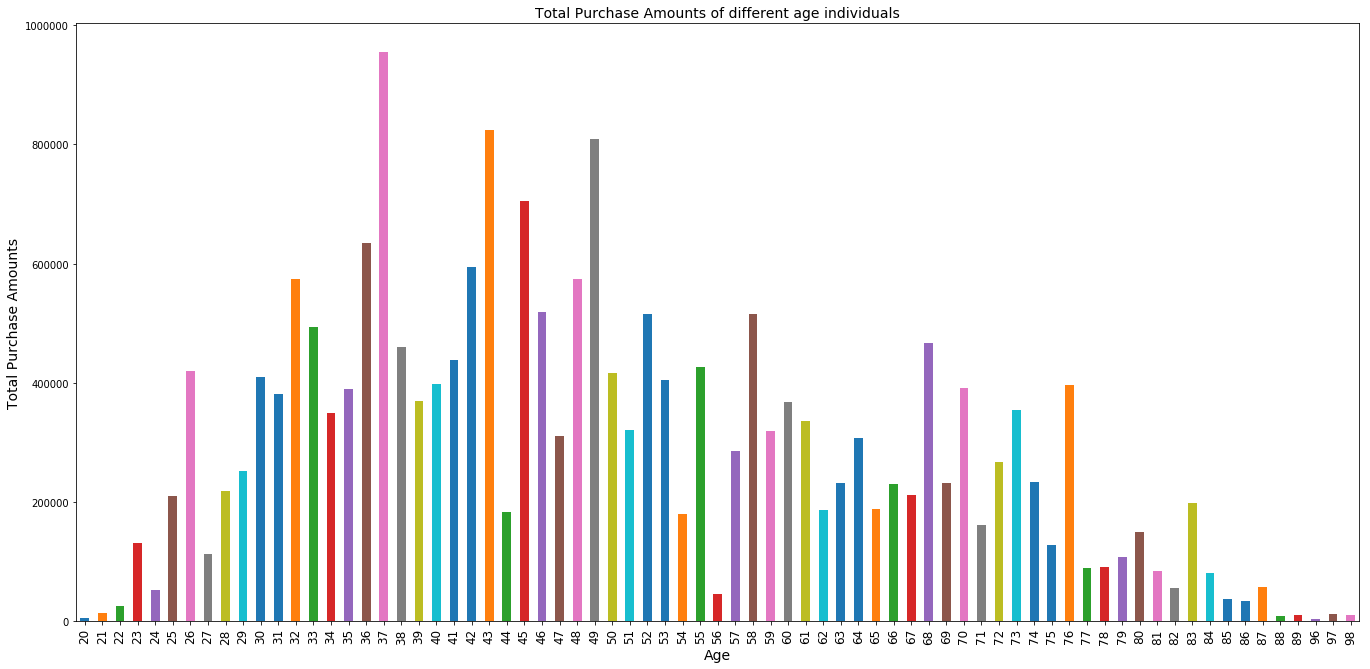

In [29]:
#Comparing total purchase amounts of different age individuals  # Need correction
pl.figure(figsize =(23,11))
dataT.groupby('age').purchase.sum().plot('bar')
#pl.ylabel('Age', fontsize=12)
#pl.xlabel('Total Purchase Amounts', fontsize=12)
pl.xlabel('Age', fontsize=14)
pl.ylabel('Total Purchase Amounts', fontsize=14)
plt.xticks(fontsize=12)

pl.title('Total Purchase Amounts of different age individuals', fontsize=14)
plt.show()

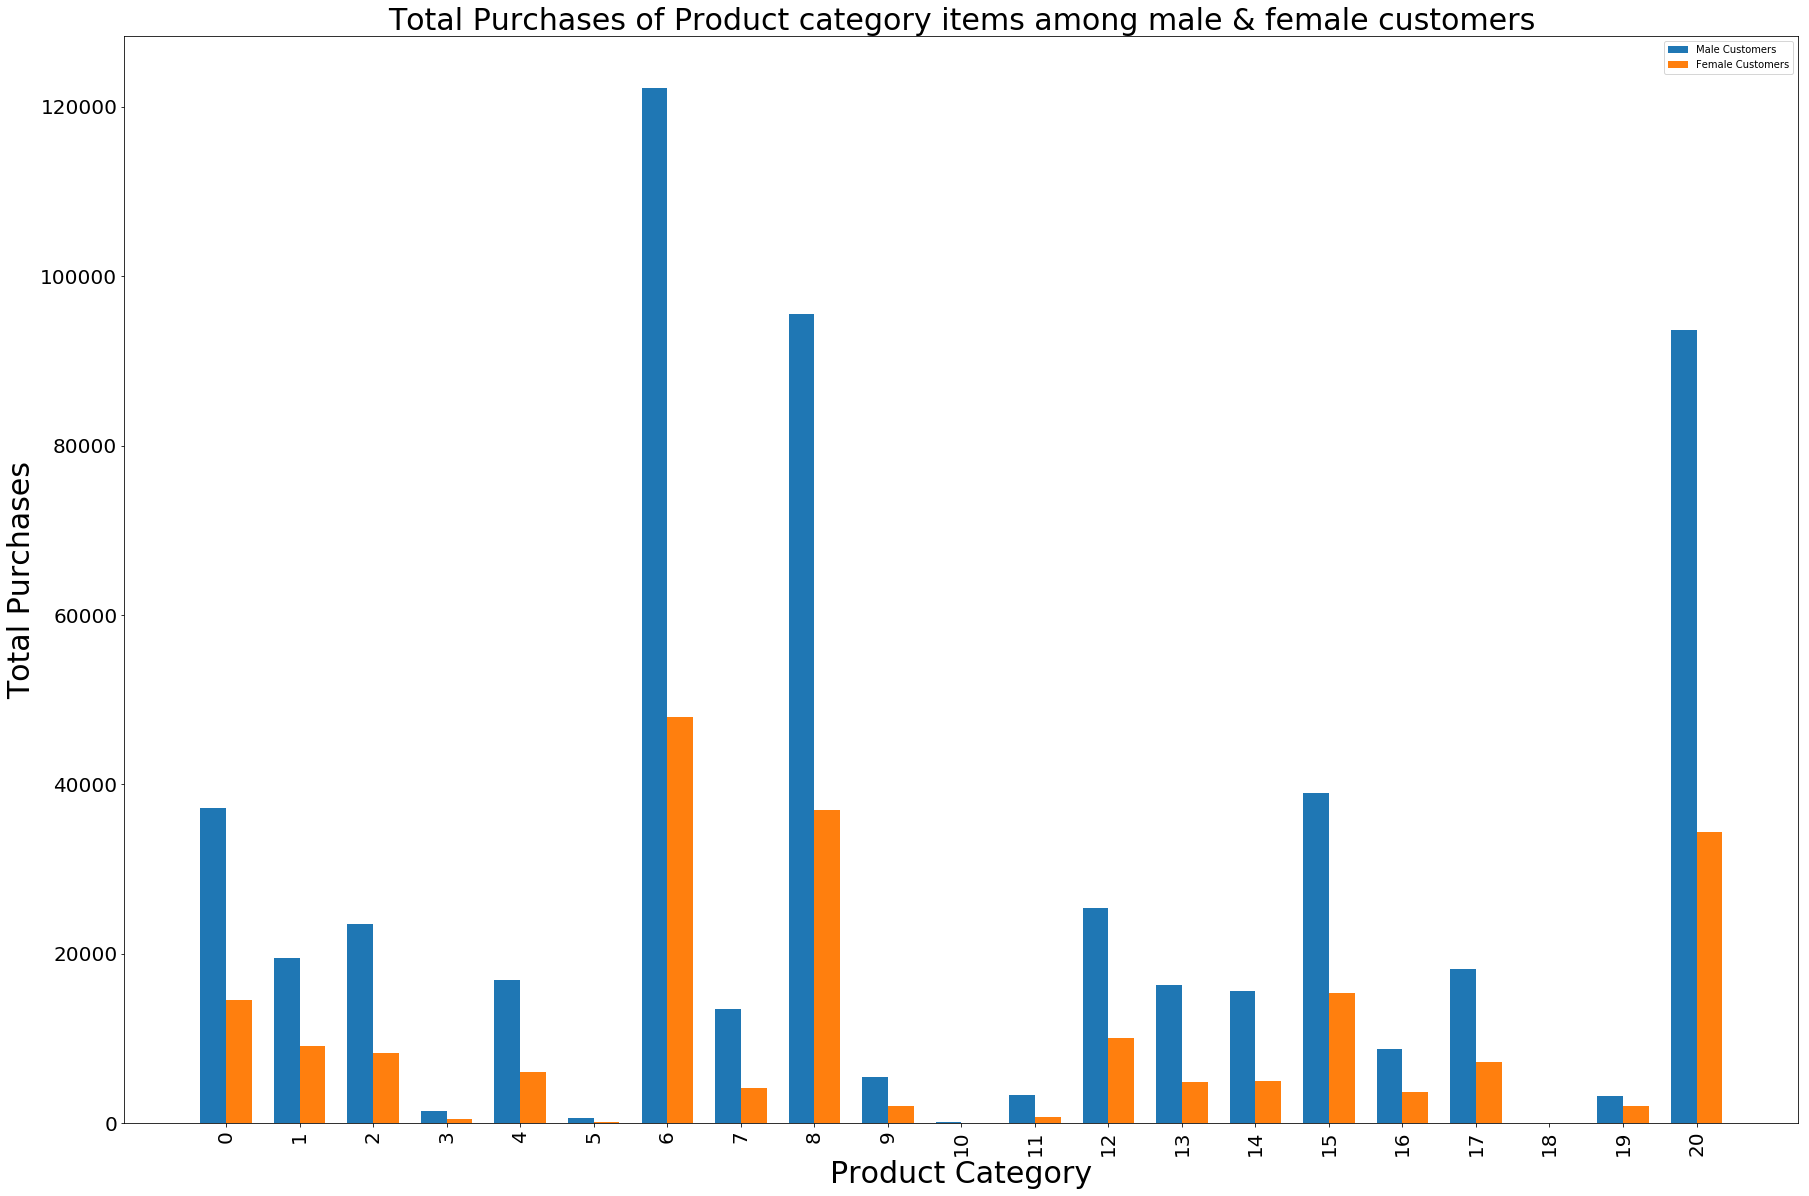

In [30]:
data=dataT#Data Transformation
encode = LabelEncoder()
#encode.fit(['0-17','18-25','26-35','36-45','46-50','51-55', '55+'])
encode.fit(dataT['category'].unique())
dataT['category'] = encode.transform(dataT['category'])

#encode.fit(['M','F'])
#data['Gender'] = encode.transform(data['Gender'])

#Total Purchases of Specific Product category 1 items among male & female customers
males_spp = data[data['gender']==0].groupby(['category']).purchase.count()
females_spp = data[data['gender']==1].groupby(['category']).purchase.count()

pl.figure(figsize =(30,20))
N = 21
ind = np.arange(N) 
width = .35       
plt.bar(ind, males_spp, width, label='Male Customers')
plt.bar(ind + width, females_spp, width, label='Female Customers')

      



plt.ylabel('Total Purchases', fontsize=30)
plt.xlabel('Product Category', fontsize=30)
plt.title('Total Purchases of Product category items among male & female customers', fontsize=30)

#plt.xticks(ind + width / 2)


plt.xticks(ind + width / 2,males_spp.index,rotation='vertical',fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')
plt.show()

In [31]:
#Data Transformation
encode = LabelEncoder()
#encode.fit(['0-17','18-25','26-35','36-45','46-50','51-55', '55+'])
encode.fit(dataT['category'].unique())
dataT['category'] = encode.transform(dataT['category'])

#encode.fit(['M','F'])
#data['Gender'] = encode.transform(data['Gender'])


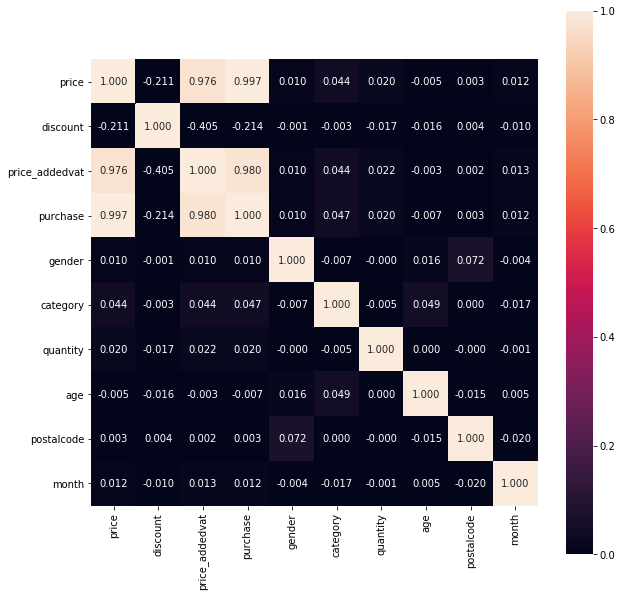

In [32]:
#Correlation matrix & Heatmap - Finding correlation
pl.figure(figsize =(10,10))
corrmat = dataT[['price','discount','price_addedvat','purchase','gender','category','quantity','age','postalcode','month']].corr()
sns.heatmap(corrmat, annot=True, fmt='.3f', vmin=0, vmax=1, square=True);
plt.show()

In [33]:
data_csv=dataT

data_csv.to_csv('DataNew.csv')